##**Importing libraries and file**

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

dataset= pd.read_csv("train.csv")

dataset.head(10)


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [2]:
dataset.shape

(14999, 9)

In [3]:
# Checking the datatype of dataset, datatype of each attribute and null values.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


## **Visualising data**

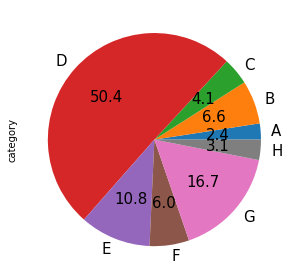

In [4]:
# Visualization
#pie chart of categories
dataset.groupby('category').size().plot(kind='pie', autopct='%.1f',textprops={'fontsize': 15},label='category',)
plt.tight_layout()

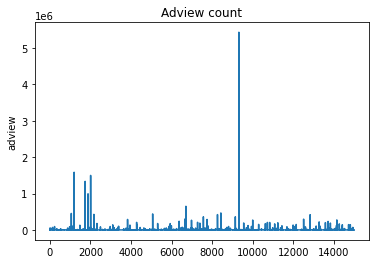

In [5]:
#Adview graph showing outlinears data which we have removed later
plt.plot(dataset["adview"])
plt.title('Adview count')
plt.ylabel('adview')
plt.show()

## **Preprocessing of data**

In [6]:
# Remove videos with adview greater than 2000000 as outlier
dataset= dataset[dataset["adview"]<2000000]

In [7]:
# Removing character "F" present in data

dataset=dataset[dataset.views!='F']
dataset=dataset[dataset.likes!='F']
dataset=dataset[dataset.dislikes!='F']
dataset=dataset[dataset.comment!='F']

dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [8]:
# Assigning each category a number for Category feature

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset["category"]=dataset["category"].map(category)

dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
# Convert values to integers for views, likes, comments, dislikes and adview

dataset["views"] = pd.to_numeric(dataset["views"])
dataset["comment"] = pd.to_numeric(dataset["comment"])
dataset["likes"] = pd.to_numeric(dataset["likes"])
dataset["dislikes"] = pd.to_numeric(dataset["dislikes"])
dataset["adview"]=pd.to_numeric(dataset["adview"])


In [10]:
column_vidid=dataset['vidid']

In [11]:
# Endoding features like Category, Duration, vidid
from sklearn.preprocessing import LabelEncoder
dataset['duration']=LabelEncoder().fit_transform(dataset['duration'])
dataset['vidid']=LabelEncoder().fit_transform(dataset['vidid'])
dataset['published']=LabelEncoder().fit_transform(dataset['published'])


dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [12]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

dataset["duration"]=time.apply(func_sec)

dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# **Checking correaltion using heatmap**

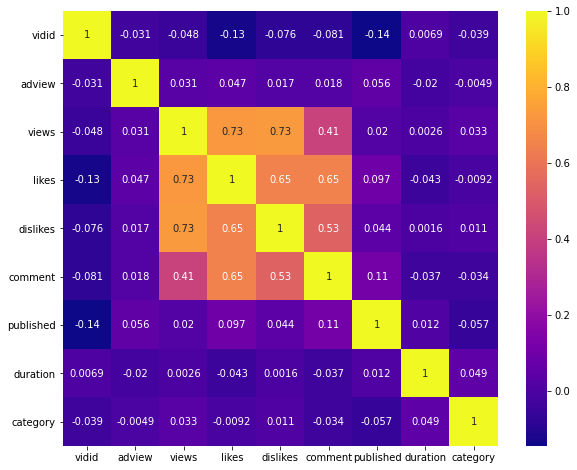

In [13]:
#Heatmap with seaborn

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='plasma',square=True, ax=ax,annot=True)
plt.show()

# **Spliting and Normalizing data**

In [14]:
#now we describe the dataset for knowing to normalize 
dataset.describe()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14636.000000,1.463600e+04,1.463600e+04,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000,14636.000000
mean,7317.500000,1.695191e+03,7.107934e+05,2784.093946,254.150724,409.035597,1547.316617,1040.232441,4.607065
std,4225.193605,2.788993e+04,2.731062e+06,8936.295816,1029.257991,1511.180179,582.891902,2316.888900,1.576242
min,0.000000,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3658.750000,1.000000e+00,3.151425e+04,88.000000,7.000000,7.000000,1135.000000,187.000000,4.000000
50%,7317.500000,2.000000e+00,1.586610e+05,450.000000,38.000000,46.000000,1699.500000,325.000000,4.000000
75%,10976.250000,6.000000e+00,5.829575e+05,1861.500000,166.250000,224.000000,2064.000000,723.000000,6.000000
max,14635.000000,1.583846e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [15]:
#Dropping column
Y_train = pd.DataFrame(data = dataset.iloc[:, 1].values, columns = ['target'])
dataset=dataset.drop(["adview"],axis=1)
dataset=dataset.drop(["vidid"],axis=1)
dataset.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [16]:
#Splitting data in 80-20 ratio for training and tesing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [17]:
# Normalise Data using min max scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

# **Training of and testing dataset using different models**

In [18]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test) #predict using model
    #error list
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [19]:
# linear Regression

from sklearn import linear_model
linear_regression = linear_model.LinearRegression() #blank model
linear_regression.fit(X_train, y_train)  #added data in model

print_error(X_test,y_test, linear_regression) #calling predict and error function

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [20]:
# Support Vector Regression

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)

print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [21]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2609.104849726776
Mean Squared Error: 884425468.1594945
Root Mean Squared Error: 29739.291655308378


In [22]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)

print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Mean Absolute Error: 3303.2307366693044
Mean Squared Error: 639827044.5903571
Root Mean Squared Error: 25294.802718945193


In [23]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 908us/step - loss: 767403776.0000 - mean_squared_error: 767403776.0000
Epoch 2/100
366/366 [==============================] - 0s 852us/step - loss: 767395968.0000 - mean_squared_error: 767395968.0000
Epoch 3/100
366/366 [==============================] - 0s 904us/step - loss: 767380544.0000 - mean_squared_error: 767380544.0000
Epoch 4/100
366/366 [==============================] - 0s 846us/step - loss: 767356544.0000 - mean_squared_error: 767356544.0000
Epoch 5/100
366/366 [==============================] - 0s 815us/step - loss: 767318528.0000 - mean_squared_error: 767318528.0000
Epoch 6/100
366/366 [==============================] - 0s 885us/step - loss: 767264256.0000 - mean_squared_error: 767264256.0000
Epoch 7/100
366/366 [==============================] - 0s 844us/step - loss: 767202048.0000 - mean_squared_error: 767202048.0000
Epoch 8/100
366/366 [==============================] - 0s 813us/step - loss: 767125696.0000 - mea

In [24]:
ann.summary() #showing summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


# **Saving model**

In [25]:
#Saving Scikitlearn models
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

#Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")